In [259]:

import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 

import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [260]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    bars_length.sort()
    ind = np.arange(len(bars_length))
    plt.figure(figsize=figsize)
    a, b = figsize
    p1 = plt.barh(ind, bars_length, height=b / len(bars_length), color='#A5C8E1')
    plt.yticks(ind, yticks_labels, fontsize=int(b / len(bars_length) * 30))
    plt.xticks(fontsize=int(a / len(bars_length) * 15))
# Я подумал, что будет красивее, если для положительных значений текст будет слева от бара,
# чтобы он не выезжал за картинку
    for i, j in enumerate(bars_length):
        if j < 0:
            plt.annotate(labels[i], xy=(0, i), xytext=(0, i),
                         xycoords='data',textcoords='data', fontsize=int(b / len(bars_length) * 30))
        else:
            plt.annotate(labels[i], xy=(0, i), xytext=(-2.7, i),
                         xycoords='data',textcoords='data', fontsize=int(b / len(bars_length) * 30))
    plt.grid(True)
    plt.title('Первый график', fontsize=15)
    plt.show()

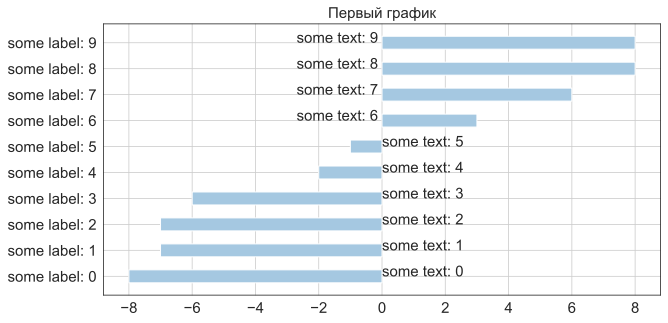

In [262]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(len(bars_length))]
labels = ['some text: {}'.format(i) for i in range(len(bars_length))]
figsize = (10, 5)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [263]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    color_map_ = plt.get_cmap('viridis')
    a, b = figsize
    indexes = np.linspace(0, len(color_map_.colors)-1, probabilities_in_time.shape[1], dtype=int)
    plt.plot(probabilities_in_time.index, probabilities_in_time[0], label='Probability: 0', color=color_map_.colors[indexes[0]])
    plt.fill_between(probabilities_in_time.index, probabilities_in_time[0], color=color_map_.colors[indexes[0]], alpha=0.4)
    for i in range(1, probabilities_in_time.shape[1]):
        plt.plot(probabilities_in_time.index, np.sum(probabilities_in_time[probabilities_in_time.columns[:i]], axis=1),
                 label='Probability: '+str(i), color=color_map_.colors[indexes[i]])
        plt.fill_between(probabilities_in_time.index, np.sum(probabilities_in_time[probabilities_in_time.columns[:i+1]], axis=1),
                         np.sum(probabilities_in_time[probabilities_in_time.columns[:i]], axis=1),
                         color=color_map_.colors[indexes[i]], alpha=0.4)
    plt.legend(loc='lower left', prop={'size': 12})
#     Вроде на рисунке была только вертикальная сетка
    plt.grid(axis='x')
#     Подгоняю размер шрифта под размер изображения
    plt.yticks(fontsize=int(b *3 ))
    plt.xticks(fontsize=int(a))
    plt.title('Второй график', fontsize=int(a))
    plt.show()

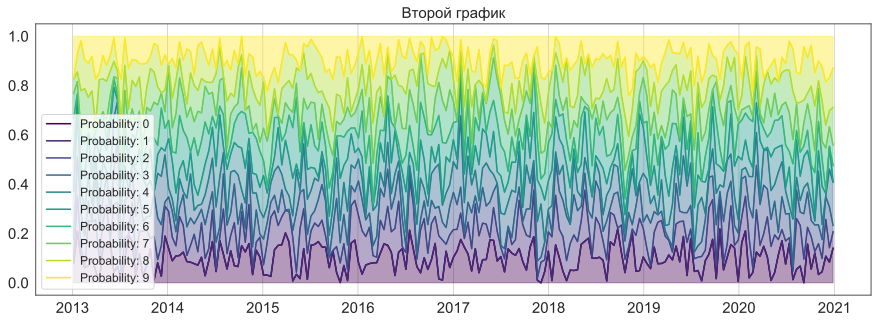

In [264]:
# Сигнатура функции и пример вывода:

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (15, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [265]:
def plot_intraday_ts(intraday_ts, figsize):
    c = np.array(intraday_ts[:-1]).reshape(24, -1, order='F')
    x = np.unique(intraday_ts.index[:-1].date)
    y = intraday_ts.index[:24].hour
    plt.figure(figsize=figsize)
    fig, ax = plt.subplots()
    gr = ax.pcolor(x, y, c,               cmap = 'coolwarm',
                  edgecolors = 'w')
    fig.autofmt_xdate()
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(9) 
    ax.set_ylabel('Время', fontsize=12)
    ax.set_xlabel('Дата', fontsize=12)
    ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
    cbaxes = fig.add_axes([0, 0.1, 0.03, 0.8]) 
    cb = plt.colorbar(gr, cax = cbaxes)  
    ax.yaxis.set_ticks_position('right')
    plt.show()

<Figure size 2160x504 with 0 Axes>

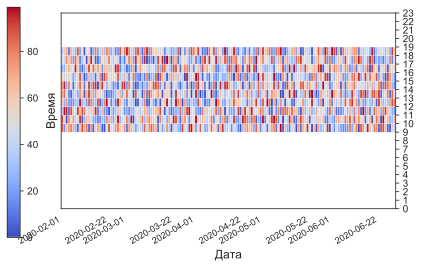

In [266]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (30, 7)


plot_intraday_ts(intraday_ts, figsize)